<a href="https://colab.research.google.com/github/Choi-Laboratory/measurement_engineering_exercises/blob/develop_exercise_3/exercises_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題3: テンプレートマッチング
テンプレートマッチングとは、入力画像の中からテンプレート画像と最も類似する領域を探索する処理です。  

一般的な手法は、入力画像の一番左上の画素から順にテンプレート画像との類似度を計算し、最も類似度が高かった領域を最終的な探索結果として出力する方法です。  

類似度の計算には様々な手法がありますが、今回は画素値の差分の二乗した値を元に類似度を評価します。  
この手法は、SSD(Sum of Squared Difference)と呼ばれ、値が小さければ小さいほど、類似度が高いと言えます。  

入力画像配列の$x$行$y$列目の画素値を $I(x, y)$ 、テンプレート画像配列の$x$行$y$列目の画素値を $T(x, y)$ 、
テンプレート画像の縦横のピクセル数をそれぞれ$w, h$とし、入力画像における走査開始地点の位置を$d_x, d_y$とすると、類似度$SSD$は次の式で求めることができます。

$$ SSD(d_x, d_y) = \sum_{x=0}^{w-1} \sum_{y=0}^{h-1} (I(d_x + x, d_y + y) - T(x, y) )^2$$



### 課題の説明
"front_face.png"の中から、テンプレート画像("mouth.png")と一致する領域を探索し、その領域を枠で囲んでください(枠の色は見やすい色にしてください)。  
類似度の計算にはSSDを用いてください。  
*cv2.matchTemplate*や*cv2.rectangle*を使えばテンプレートマッチングの処理や枠の描写が簡単にできますが、この課題ではそのような外部ライブラリの関数を利用することは禁止します。  
各自でプログラムを書く際は、```import xxx``` や ```from yyy import xxx``` を使って外部ライブラリをインポートしないようにしてください。  
外部ライブラリを使った場合は、減点します。  

- 課題の手順
    - 1/4 ~ 3/4のセルを実行し、配布した画像をGoogle Colabに読み込ませる。  
    - 4/4のセルに各自でテンプレートマッチング及び枠の描写の処理を記述する。
    - 出力画像(テンプレートマッチングの探索結果を枠で囲った画像)とプログラムのソースコードを提出する。

一例として、"front_face.png"に対してテンプレート画像("right_eye.png")を探索した結果を示します。

![image URL](https://github.com/Choi-Laboratory/measurement_engineering_exercises/blob/master/images/TemplateMatching_result.png)

In [1]:
"""1/4 ※書き換える必要なし
＜外部モジュールのインポート＞
"""
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
print("cv2 version :", cv2.__version__)

cv2 version : 4.1.2


以下のような文章が出力されたら、外部モジュールのインポートが完了です。  

```
cv2 version : 4.1.2
```

これで画像の読み込みや出力ができるようになりました。  
※バージョンの数字が違う場合がありますが特に心配しなくても大丈夫です。

Saving front_face.png to front_face.png


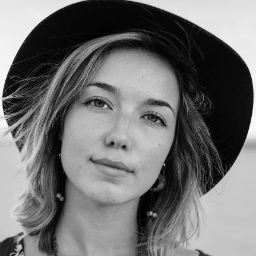

In [2]:
""" 2/4 ※書き換える必要なし
＜顔画像の入力＞
セルを実行すると「ファイル選択」が出てきます。
それをクリックし、課題データと一緒に配布した"front_face.png"を選択してください。
"""
uploaded = files.upload()
input_img_name = "front_face.png"
input_raw_img = cv2.imread(input_img_name)
input_img = cv2.cvtColor(input_raw_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(input_img)

読み込んだ画像("front_face.png")が出力されたら、入力画像の読み込みが無事にできています。

Saving mouth.png to mouth.png


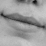

In [3]:
""" 3/4 ※書き換える必要なし
＜テンプレート画像の入力＞
セルを実行すると「ファイル選択」がでてきます。
それをクリックし、課題データと一緒に配布した"mouth.png"を選択してください。
"""
uploaded = files.upload()
template_img_name = "mouth.png" #"right_eye.png"
tmp_raw_img = cv2.imread(template_img_name)
tmp_img = cv2.cvtColor(tmp_raw_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(tmp_img)

読み込んだ画像("mouth.png")が出力されたら、テンプレート画像の読み込みが無事にできています。

ここまでできたら準備完了です。  
4/4のセルにテンプレートマッチングと探索結果を枠で囲むプログラムを記述してください。


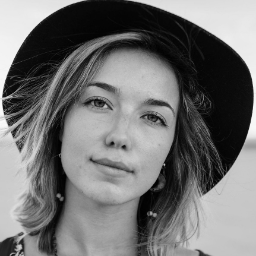

In [8]:
"""4/4 ※各自で記述する
＜テンプレートマッチング及び枠の描画＞
課題の説明をよく読みながら、テンプレートマッチングとその探索領域を囲む枠を描画するプログラムを書いてください。
「cv2」と名前が付く関数は使わないでください（cv2_imshowは使用してOK）。

input_raw_imgやinput_imgに枠を付けてしまうと、次回実行時にも枠がついたままになってしまいます（もとに戻したい場合は2/4のセルを実行しなおしてください）。
そのため枠の描画処理はresult_imgに対して施すようにしてください。
"""
input_w, input_h = input_img.shape #入力画像のピクセル数を取得し、input_w（横）とinput_h（縦）に代入する
tmp_w, tmp_h = tmp_img.shape #テンプレート画像のピクセル数を取得し、tmp_w（横）とtmp_h（縦）に代入する

result_img = input_raw_img.copy() #出力画像用に入力画像をコピーする

#1.テンプレートマッチングの実行


#2.テンプレートマッチングの探索結果を枠で囲む


cv2_imshow(result_img) #result_imgを出力